<a href="https://colab.research.google.com/github/Nanda-Re/BasDatLanjut/blob/main/EfficientNetB2_on_rotten_fruit_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fruits-fresh-and-rotten-for-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F46490%2F84555%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240618%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240618T060756Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4ed977983f7a900ca8dcb98183b190177668c680c022bde3b0733ad7fc604c704473a3e08e2c404bdf1ffb114ef58d468b34dfa5148dfb75046730892ca9086f76f31a35ca127afd496d27a7827be294a7a022dd6306efc7bcbfe1a135c9bee2570ddbbecb08fcd99546dd36b015801b6e358d7157932bbdb40497b45d7d9c55b593f6b602f5e11bde405a274018c0d2bdf646108d1f79f897aae7551d21ff6723b234177980d6d2446c7acb43a07e7106d94d314a3b6aa9b848c1d6b8f23922677b99ffd3db59465503b7db49904596ba4867b31ef2e1f205053e1972ffcc30647057d66d66d2b0546fcea8a4283828b0ec621930cbaac01374193fddabe4da'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 3845474308 bytes downloaded
Downloaded and uncompressed: fruits-fresh-and-rotten-for-classification
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.
31790344/31790344 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 9, 9, 1408)        7768569   
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1408)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1408)              0         
                                                                 
 dense (Dense)               (None, 6)                 8454      
                                                                 
Total params: 7777023 (29.67 MB)
Train

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


85/85 [==============================] - 17s 193ms/step - loss: 0.0330 - accuracy: 0.9930
Validation loss: 0.033018480986356735
Validation accuracy: 0.9929577708244324


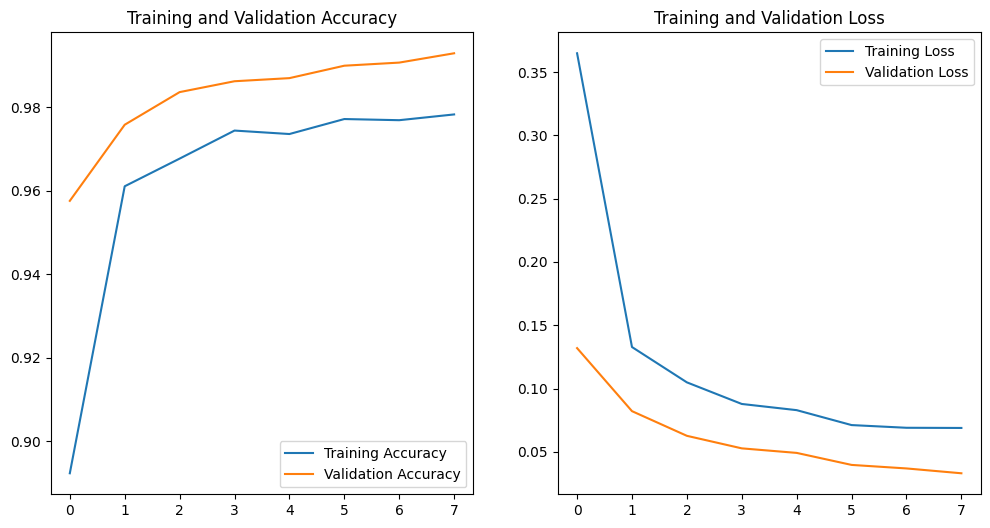

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define paths to the training and validation datasets
train_dir = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train/'
validation_dir = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test/'

# Set parameters
img_height, img_width = 260, 260  # EfficientNetB2 expects 260x260 images
batch_size = 32
epochs = 8
num_classes = 6  # Set this to the number of classes in your dataset

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only preprocessing for validation
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Flow validation images in batches using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the EfficientNetB2 model pre-trained on ImageNet, excluding the top layers
base_model = EfficientNetB2(input_shape=(img_height, img_width, 3),
                            include_top=False,
                            weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Save the model
model.save('efficientnetb2_image_classification_model.h5')

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation loss: {loss}')
print(f'Validation accuracy: {accuracy}')

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 9, 9, 1408)        7768569   
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1408)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 1408)              0         
                                                                 
 dense (Dense)               (None, 6)                 8454      
                                                                 
Total params: 7777023 (29.67 MB)
Trainable params: 8454 (33.02 KB)
Non-trainable params: 7768569 (29.63 MB)
_________________________________________________________________
Epoch 1/8
340/

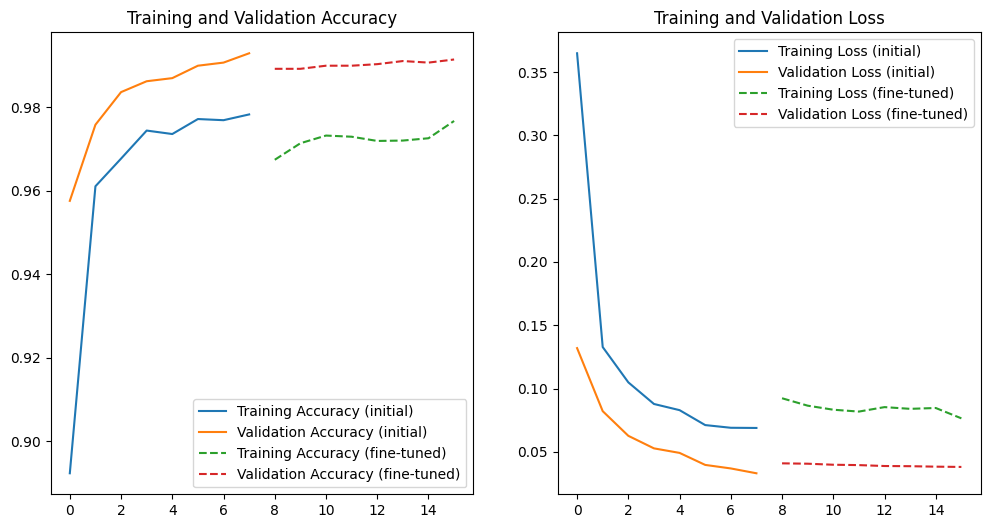

In [4]:
# Unfreeze the top layers of the base model
# Let's unfreeze the last 20 layers for fine-tuning
for layer in base_model.layers[-5:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary to check the trainable layers
model.summary()

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,  # You may increase the number of epochs for fine-tuning
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Save the model architecture as a JSON file
model_json = model.to_json()
with open('efficientnetb2_fine_tuned_image_classification_model.json', 'w') as json_file:
    json_file.write(model_json)

# Save the fine-tuned model
model.save('efficientnetb2_fine_tuned_image_classification_model.h5')

# Evaluate the fine-tuned model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation loss after fine-tuning: {loss}')
print(f'Validation accuracy after fine-tuning: {accuracy}')

# Plot training & validation accuracy and loss values for initial training and fine-tuning
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

acc_fine = history_fine.history['accuracy']
val_acc_fine = history_fine.history['val_accuracy']
loss_fine = history_fine.history['loss']
val_loss_fine = history_fine.history['val_loss']

# Adjusting the length of epochs_range for the concatenated data
fine_epochs_range = range(epochs, epochs + len(acc_fine))

plt.figure(figsize=(12, 6))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy (initial)')
plt.plot(epochs_range, val_acc, label='Validation Accuracy (initial)')
plt.plot(fine_epochs_range, acc_fine, label='Training Accuracy (fine-tuned)', linestyle='dashed')
plt.plot(fine_epochs_range, val_acc_fine, label='Validation Accuracy (fine-tuned)', linestyle='dashed')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss (initial)')
plt.plot(epochs_range, val_loss, label='Validation Loss (initial)')
plt.plot(fine_epochs_range, loss_fine, label='Training Loss (fine-tuned)', linestyle='dashed')
plt.plot(fine_epochs_range, val_loss_fine, label='Validation Loss (fine-tuned)', linestyle='dashed')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


# JSON

In [5]:
from tensorflow.keras.models import model_from_json

# Load the model architecture from the JSON file
with open('efficientnetb2_fine_tuned_image_classification_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

# Load the model weights
loaded_model.load_weights('efficientnetb2_fine_tuned_image_classification_model.h5')

# Compile the loaded model
loaded_model.compile(optimizer=Adam(),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Now you can use `loaded_model` for inference or further training


85/85 [==============================] - 19s 219ms/step


<Figure size 1000x800 with 0 Axes>

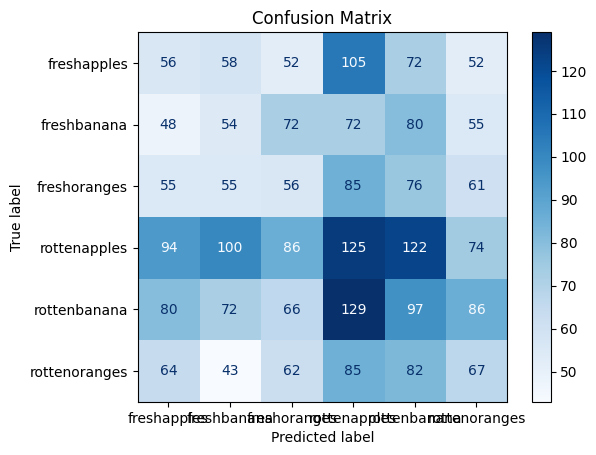

In [7]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = validation_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=validation_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()